# Linear regression via gradient descent

We want to find the vector $\theta$ that minimizes the loss/cost function $J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$, where $h_\theta(x^{(i)}) = \theta^T X_i$.

Gradient descent begins with $\theta_{\text{init}}$ then updates $\theta$ iteratively such that $\theta_j := \theta_j - \alpha \dfrac{\partial J(\theta)}{\partial \theta_j}$, where $\alpha$ is a learning rate or step size parameter. In this way, we are taking first order steps along the gradient towards the direction with lower $J(\theta)$.

The partial derivative of the cost function with respect to parameter $\theta_j$ is $\dfrac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$, which means that the update rule can be written as $\theta_j := \theta_j - \alpha \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')


class LinearModel(object):
    """Define and fit linear models"""
    
    
    def __init__(self, X, y):
        """Initializing a model
            
    Args: 
        X (numpy.array): n-by-p design matrix
        y (vector): n-vector of responses
        """
        self.X = X
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.y = y
    
    
    def predict(self, theta):
        """Compute hypothesis function X * theta

        Args: 
            X: Design matrix
            theta: parameter vector

        Returns: 
            prediction: the product of X and theta
        """
        prediction = self.X.dot(theta)
        return prediction
    
    
    def partial_J(self, theta, j):
        """Computes partial derivative of J wrt theta

        Args: 
            theta: vector of coefficients
            j: index for a coefficient (element in theta)

        Returns: 
            dJ/dtheta_j (float)
        """
        return sum((self.predict(theta) - self.y) * self.X[:, j])

    
    def optimize(self, alpha, iters):
        """Implements gradient descent

        Args: 
            alpha: (float) learning rate
            iters: (int) number of iterations (steps to take)

        Returns: 
            theta_out: (numpy array) value of theta at each iteration
        """
        theta_init = np.random.normal(size = self.p)
        theta = np.empty([iters, self.p])
        theta[0, :] = theta_init
        for i in range(1, iters):
            for j in range(self.p):
                theta[i, j] = theta[i - 1, j] - alpha * self.partial_J(theta[i - 1, :], j)
        self.theta_out = theta

In [2]:
## Define parameters as global variables
N = 5000  # sample size
p = 5     # number of coefficients
sigma = 1

# make design matrix
X = np.column_stack((np.repeat(1, N), np.random.rand(N, p - 1)))
print(X.shape)

# assign true coefficients
true_theta = np.random.normal(0, 3, p)
print(true_theta)

# generate response vector
y = X.dot(true_theta) + np.random.normal(0, sigma, N)

(5000, 5)
[-3.81084584  2.35903755 -2.67789283  0.7126973  -0.25931611]


Now, we can initialize the parameters at some random, dispersed values, choose the learning rate, and iteratively update our parameter vector using gradient descent.

In [3]:
m = LinearModel(X, y)
m.optimize(alpha = .0001, iters = 1000)

Last, plot the results to evaluate convergence and parameter recovery.

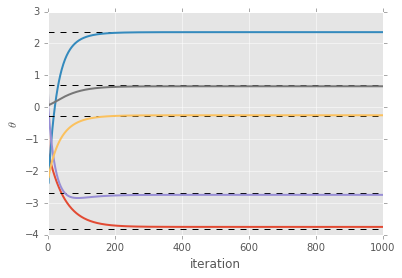

In [4]:
for i in range(m.theta_out.shape[1]):
    plt.axhline(true_theta[i], linestyle = 'dashed', color = 'black')
    plt.plot(range(m.theta_out.shape[0]), m.theta_out[:, i], lw = 2)
    plt.xlabel('iteration')
    plt.ylabel(r'$\theta$')